# Session 14 - Project - 3

This data was extracted from the census bureau database found at
http://www.census.gov/ftp/pub/DES/www/welcome.html
Donor: Ronny Kohavi and Barry Becker,
Data Mining and Visualization
Silicon Graphics.
e-mail: ronnyk@sgi.com for questions.
Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
48842 instances, mix of continuous and discrete (train=32561, test=16281)
45222 if instances with unknown values are removed (train=30162, test=15060)
Duplicate or conflicting instances : 6
Class probabilities for adult.all file
Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions:

((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) Prediction task is to determine whether a person makes over 50K a year. Conversion of original data as follows:

1. Discretized a gross income into two ranges with threshold 50,000.
2. Convert U.S. to US to avoid periods.
3. Convert Unknown to "?"
4. Run MLC++ GenCVFiles to generate data,test.

Description of fnlwgt (final weight)
The weights on the CPS files are controlled to independent estimates of the civilian
noninstitutional population of the US. These are prepared monthly for us by Population
Division here at the Census Bureau. We use 3 sets of controls.

In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn import decomposition
from sklearn import feature_extraction
from sklearn import feature_selection
from sklearn import model_selection

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

In [5]:
# Define column names for the data present at above mentioned URL
columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']

In [6]:
# loading dataset into Pandas DataFrame
df = pd.read_csv(url, names=columns)

In [7]:
# Check dataframe header
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
# Check shape of the dataframe
df.shape

(32561, 15)

In [9]:
# View summary of dataframe - statistical information only about numerical columns will be shown
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
# Calculate percentage of different-2 classes in the Pandas dataframe
from collections import Counter

dict = Counter(df['salary'])
print(f"dictionary with all classes : {dict}")
print(f"Keys for the different-2 classes : {dict.keys()}")
print(f"dict[' >50K'] : {dict[' >50K']} , dict[' <=50K'] : {dict[' <=50K']}")
print(f"Class 1 percentage : {dict[' >50K']/len(df)*100} , Class 2 percentage : {dict[' <=50K']/len(df)*100}")

dictionary with all classes : Counter({' <=50K': 24720, ' >50K': 7841})
Keys for the different-2 classes : dict_keys([' <=50K', ' >50K'])
dict[' >50K'] : 7841 , dict[' <=50K'] : 24720
Class 1 percentage : 24.080955744602438 , Class 2 percentage : 75.91904425539757


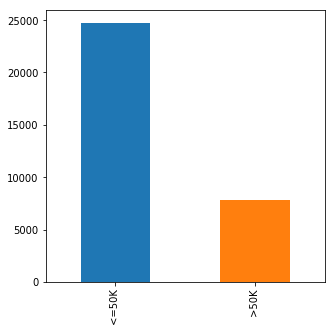

In [11]:
%matplotlib inline
# Visualize column salary of the dataframe
df['salary'].value_counts()

df['salary'].value_counts().plot(kind='bar',figsize=(5,5))

In [12]:
df['salary'] = df['salary'].map({' >50K': 1, ' <=50K': 0})

#### Preprocessing (Handling Missing/Duplicate/Categorical data)

In [13]:
# Print information about missing data
print(f"Check count of the missing data in dataframe : {df.isna().any().count()}")

# Handle missing data in the newly created dataframe if there is any
if df.isna().any().count() :
    df.fillna(value=-99999,axis=1,inplace=True)
    #print(f"\nheader of the new dataframe after handling of the missing data : \n{df1.head}")
    print("Info : Missing entries are updated in the dataframe")


# Handle categorical data
df1 = pd.get_dummies(df)

# Print information such as shape, duplicate entries in newly created dataframe
print(f"\nshape of the new dataframe before preprocessing : {df1.shape}")
print(f"Check count of the duplicated data in newly create dataframe : {df1.duplicated().sum()}")

# Remove Duplicates if there is any
if df1.duplicated().any().sum() :
    df1.drop_duplicates(inplace=True)
    print(f"\nshape of the new dataframe after removal of duplicate entries : {df1.shape}")

Check count of the missing data in dataframe : 15
Info : Missing entries are updated in the dataframe

shape of the new dataframe before preprocessing : (32561, 109)
Check count of the duplicated data in newly create dataframe : 24

shape of the new dataframe after removal of duplicate entries : (32537, 109)


In [15]:
# print(f"\ncheck statistical information about newly created dataframe after preprocessing : \n\n{df1.describe()}")

In [16]:
# Split dataframe into df_x and df_y
df_x = df1.drop(['salary'], 1)
df_y = df1['salary']

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Use RandomForestRegressor to check feature_importances
rfc = RandomForestClassifier(random_state=10)
rfc.fit(df_x, df_y)

feature_importances = pd.DataFrame({'feature':df_x.columns,'importance':np.round(rfc.feature_importances_,4)})
feature_importances = feature_importances.sort_values('importance',ascending=False).set_index('feature')

C:\Users\Swami\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


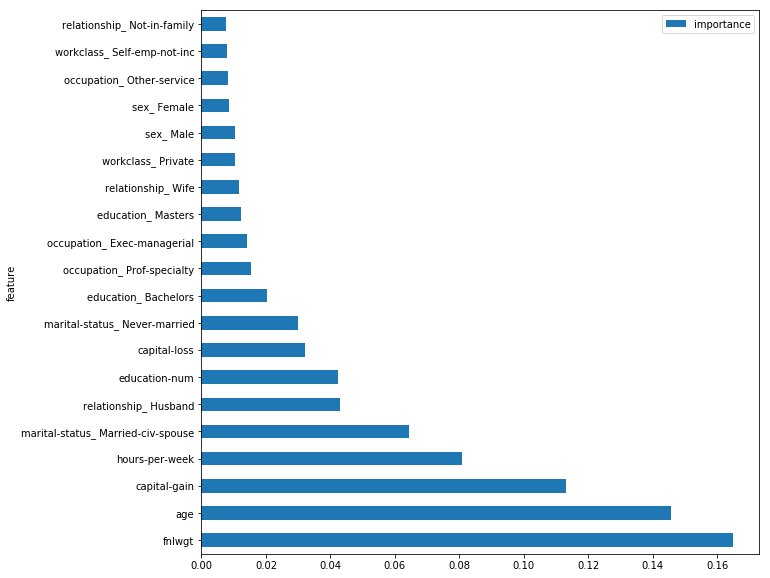

In [18]:
# Visualize top 20 features of the dataframe
feature_importances[:20].plot(kind='barh',figsize=(10,10))

#### Apply model on training and test dataset

In [24]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Split dataset into train(75%),test(10%),cross-validation(15%)
x, x_test, y, y_test = train_test_split(df_x,df_y,test_size=1/3,train_size=2/3, random_state = 11)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.40,train_size =0.60, random_state = 11)

In [25]:
# Apply logistic regression model on the dataset
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

lr1 = LogisticRegression()
lr = RFE(lr1, 50)
lr.fit(x_train,y_train)

C:\Users\Swami\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Swami\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Swami\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Swami\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Swami\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\Swami\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Swami\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Swami\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Swami\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Swami\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=50, step=1, verbose=0)

In [26]:
# Apply decision tree classifier model on the dataset
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier(min_samples_split=10, random_state=55, max_features=50)
d_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best')

In [27]:
# Apply Bagging classifier on the dataset
from sklearn.ensemble import BaggingClassifier

Boosting = BaggingClassifier(n_estimators=200)
Boosting.fit(x_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=200, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [28]:
# Apply Random forest classifier on the dataset
rfc = RandomForestClassifier(random_state=55,max_features=50)
rfc.fit(df_x,df_y)

C:\Users\Swami\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=55, verbose=0, warm_start=False)

#### Analyse model performances using roc_auc_score and accuracy score

In [29]:
from sklearn.metrics import r2_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve, auc

In [30]:
models = pd.DataFrame(index=['train_ras','cv_ras','test_ras','accuracy_score'], 
                      columns=['logistic_regression','decision_tree','random_forest','xgboost'])

In [31]:
models.loc['train_ras','logistic_regression'] = roc_auc_score(y_true=y_train, y_score=lr.predict(x_train))
models.loc['cv_ras','logistic_regression'] = roc_auc_score(y_true=y_cv, y_score=lr.predict(x_cv))
models.loc['test_ras','logistic_regression'] = roc_auc_score(y_true=y_test, y_score=lr.predict(x_test))
models.loc['accuracy_score','logistic_regression'] = accuracy_score(y_pred=lr.predict(x_test).round(), y_true=y_test)

models.loc['train_ras','decision_tree'] = roc_auc_score(y_score=d_tree.predict(x_train), y_true=y_train)
models.loc['cv_ras','decision_tree'] = roc_auc_score(y_score=d_tree.predict(x_cv), y_true=y_cv)
models.loc['test_ras','decision_tree'] = roc_auc_score(y_score=d_tree.predict(x_test), y_true=y_test)
models.loc['accuracy_score','decision_tree'] = accuracy_score(y_pred=d_tree.predict(x_test).round(), y_true=y_test)

models.loc['train_ras','random_forest'] = roc_auc_score(y_score=rfc.predict(x_train), y_true=y_train)
models.loc['cv_ras','random_forest'] = roc_auc_score(y_score=rfc.predict(x_cv), y_true=y_cv)
models.loc['test_ras','random_forest'] = roc_auc_score(y_score=rfc.predict(x_test), y_true=y_test)
models.loc['accuracy_score','random_forest'] = accuracy_score(y_pred=rfc.predict(x_test).round(), y_true=y_test)

models.loc['train_ras','xgboost'] = roc_auc_score(y_score=Boosting.predict(x_train), y_true=y_train)
models.loc['cv_ras','xgboost'] = roc_auc_score(y_score=Boosting.predict(x_cv), y_true=y_cv)
models.loc['test_ras','xgboost'] = roc_auc_score(y_score=Boosting.predict(x_test), y_true=y_test)
models.loc['accuracy_score','xgboost'] = accuracy_score(y_pred=Boosting.predict(x_test).round(), y_true=y_test)

In [32]:
models

,logistic_regression,decision_tree,random_forest,xgboost
train_ras,0.730128,0.899801,0.97822,1
cv_ras,0.72757,0.741519,0.972799,0.764551
test_ras,0.724018,0.75134,0.976921,0.767065
accuracy_score,0.829338,0.828877,0.987922,0.850544


#### It is clear by analyzing the roc_auc_score and accuracy_score that random forest is the best model to do the prediction using the census bureau database. So we will use random forest to proceed further for checking model performance on this dataset.

In [33]:
confusion_matrix(y_pred=rfc.predict(x_test), y_true=y_test)

array([[8200,   14],
       [ 117, 2515]], dtype=int64)

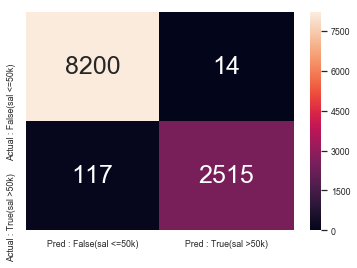

In [34]:
import seaborn as sn

arr=confusion_matrix(y_pred=rfc.predict(x_test), y_true=y_test)

df_cm = pd.DataFrame(arr, range(2), range(2))
#plt.figure(figsize = (4,3))
sn.set(font_scale=0.8)#for label size
sn.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 25},
           fmt='.4g',
           xticklabels=['Pred : False(sal <=50k)','Pred : True(sal >50k)'], 
           yticklabels=['Actual : False(sal <=50k)','Actual : True(sal >50k)'],)# font size

#### Sometimes it is not sufficient to conclude a model performance only using the accuracy score as that can be good due to class imbalance also. So we need to analyse Recall,Precision,F1-score which will give a clear statistics on all the available classes in the dataset.

In [35]:
# Manual calculation of Recall, Precision and other statistics
(TN, FP), (FN, TP) = confusion_matrix(y_pred=rfc.predict(x_test), y_true=y_test)

# Overall accuracy
acc = (TP+TN)/(TP+FP+FN+TN)
# Sensitivity/Recall, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

print(f"Sensitivity/Recall : {TPR} \nSpecificity:{TNR} \nPrecision : {PPV} \nF1-score : {(2*PPV*TPR)/(PPV+TPR)}")

Sensitivity/Recall : 0.9555471124620061 
Specificity:0.9982955928901874 
Precision : 0.9944642151047846 
F1-score : 0.9746173222243752


In [36]:
# Above statistics manipulation can also be done using the functions implemented in sklearn.metrics as below
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
precision_score(y_true=y_test, y_pred=rfc.predict(x_test))
recall_score(y_true=y_test, y_pred=rfc.predict(x_test))
f1_score(y_true=y_test, y_pred=rfc.predict(x_test))

0.9746173222243752

In [37]:
# Using classification_report we can get detailed info about each class
print(classification_report(y_true=y_test, y_pred=rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8214
           1       0.99      0.96      0.97      2632

   micro avg       0.99      0.99      0.99     10846
   macro avg       0.99      0.98      0.98     10846
weighted avg       0.99      0.99      0.99     10846



ROC AUC: 0.00


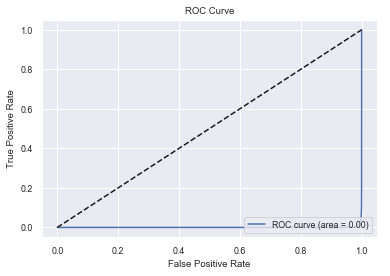

ROC AUC: 1.00


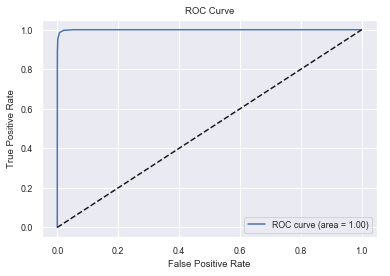

In [39]:
# Plot ROC Curve and caluclate AUC
import matplotlib.pyplot as plt

for i in range(2): # as there are two classes in our dataset for prediciton
    
    # Determine the false negative and true negative rates (when i = 0)
    # Determine the false positive and true positive rates (when i = 1)
    fpr, tpr, _ = roc_curve(y_test, rfc.predict_proba(x_test)[:,i])

    # Calculate the AUC (area under curve)
    roc_auc = auc(fpr, tpr)
    print('ROC AUC: %0.2f' % roc_auc)

    # Plot of a ROC curve for a specific class
    plt.figure()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

Conclusion from ROC Curve :
IN curve-1 (used for class 0 : salary <=50k) : AUC - 0 and prediction for this class is happening perfectly.
IN curve-1 (used for class 1 : salary  >50k) : AUC - 1 and prediction for this class is happening perfectly.

##### So random forest is the best model which is providing best accuracy, precision, recall, F1-score.